# IPython's Data Publication API

IPython has an API that allows IPython Engines to publish data back to the Client.  This Notebook shows how this API works.

## Setup

We begin by enabling matplotlib plotting and creating a `Client` object to work with an IPython cluster.

In [2]:
%matplotlib inline

In [3]:
import ipyparallel as ipp

In [4]:
c = ipp.Client()
dv = c[:]
dv.block = False
dv

<DirectView [0, 1, 2, 3]>

## Simple publication

Here is a simple Python function we are going to run on the Engines.  This function uses `publish_data` to publish a simple Python dictionary when it is run.

In [11]:
def publish_it():
    from ipyparallel.datapub import publish_data
    publish_data(dict(a='hi2'))

We run the function on the Engines using `apply_async` and save the returned `AsyncResult` object:

In [15]:
ar = dv.apply_async(publish_it)

The published data from each engine is then available under the `.data` attribute of the `AsyncResult` object.

In [16]:
ar.data

[{'a': 'hi2'}, {'a': 'hi2'}, {'a': 'hi2'}, {'a': 'hi2'}]

Each time `publish_data` is called, the `.data` attribute is updated with the most recently published data.

## Simulation loop

In many cases, the Engines will be running a simulation loop and we will want to publish data at each time step of the simulation.  To show how this works, we create a mock simulation function that iterates over a loop and publishes a NumPy array and loop variable at each time step. By inserting a call to `time.sleep(1)`, we ensure that new data will be published every second.

In [25]:
def simulation_loop():
    from ipyparallel.datapub import publish_data
    import time
    import numpy as np
    for i in range(10):
        publish_data(dict(a=np.random.rand(20), i=i))
        time.sleep(2)

Again, we run the `simulation_loop` function in parallel using `apply_async` and save the returned `AsyncResult` object.

In [26]:
ar = dv.apply_async(simulation_loop)

New data will be published by the Engines every second.  Anytime we access `ar.data`, we will get the most recently published data.

In [27]:
import matplotlib.pyplot as plt

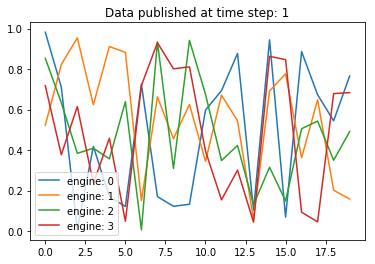

In [28]:
data = ar.data
for i, d in enumerate(data):
    plt.plot(d['a'], label='engine: '+str(i))
plt.title('Data published at time step: ' + str(data[0]['i']))
plt.legend()